# Import & Cleanup

In [1]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_spss("./Data/private_landlord_survey/UKDA-8455-spss/spss/epls_2018_forarchive.sav")

In [10]:
df = df[["serial_2", # Unique Identifier
        "LLeth2cat", # LL ethnicity
        "Age4cat", # LL Age
        "ValperPrpA", # Avg mkt val per prop
        "MktValgrpA", # Mkt val all props
        "BTL", # Buy to let loan/other
        "LnperPrpA", # Avg loan per prop
        "LnValgrpA", # Total val all loans
        "LTVgrpA", # LTV market val
        "TmLLgrpB", # How long been LL
        "LLExp", # Length experience as LL
        "NumPrpgrp", # How many props
        "RtIncgrpa", # Gross rental inc
        "LLIncgrpA", # Total LL inc no rent
        "TotIncgrp", # Total LL inc
        "RtPrIncgrpA", # Rent as prop. inc
        "Port_size", # Portfolio size
        "LLEmpl01", # Emp. Status: FT
        "LLEmpl02", # Emp. Status: PT
        "LLEmpl03", # Emp. Status: Self-employed as LL
        "LLEmpl04", # Emp. Status: Self-employed
        "LLEmpl05", # Emp. Status: Retired
        "LLEmpl06", # Emp. Status: Company director
        "LLEmpl07", # Emp. Status: Student
        "LLEmpl08", # Emp. Status: FT carer
        "LLEmpl09", # Emp. Status: Unemployed
        "LLOrg1", # LL Org: National LLs Assc.
        "LLOrg2", # LL Org: Residential LL Assc.
        "LLOrg3", # LL Org: Other professional
        "LLOrg4", # LL Org: None
        "AgOrg1", # Rental Org: ARLA
        "AgOrg2", # Rental Org: NAEA
        "AgOrg3", # Rental Org: NALS
        "AgOrg4", # Rental Org: UKALA
        "AgOrg5", # Rental Org: Other
        "AgOrg6", # Rental Org: None
        "Regprop01", # Prop Region: East England
        "Regprop02", # Prop Region: East Midlands
        "Regprop03", # Prop Region: Inner London
        "Regprop04", # Prop Region: Outer London
        "Regprop05", # Prop Region: North East
        "Regprop06", # Prop Region: North West
        "Regprop07", # Prop Region: South East
        "Regprop08", # Prop Region: South West
        "Regprop09", # Prop Region: West Midlands
        "Regprop10", # Prop Region: Yorkshire/Humber
        "LLInfo01", # Where info: Letting Agent
        "LLInfo02", # Where info: LL membership ass. or org
        "LLInfo03", # Where info: Online landlord forums/websites
        "LLInfo04", # Where info: Gov't websites
        "LLInfo05", # Where info: Family/friends
        "LLInfo06", # Where info: Online media
        "LLInfo07", # Where info: TV
        "LLInfo08", # Where info: Radio
        "LLInfo09", # Where info: Newspapers
        "AgtuseA1", # Agent use: For letting svcs
        "AgtuseA2", # Agent use: For mgmt svcs
        "AgtuseA3", # Agent use: None
        "FutVac", # Next Vacancy will relet
        "FutProp", # Next two years, plan
        "FutRLv1", # LL leave/reduce: Financial
        "FutRLv2", # LL leave/reduce: Personal
        "FutRLv3", # LL leave/reduce: Legislative
        "FutRLv4", # LL leave/reduce: Other
        "FutRLv5", # LL leave/reduce: None
        "FutRLv6", # LL leave/reduce: Don't Know
        "FutInc1", # LL Increase/maintain: Financial
        "FutInc2", # LL Increase/maintain: Personal
        "FutInc3", # LL Increase/maintain: Legislative
        "FutInc4", # LL Increase/maintain: Other
        "FutInc5", # LL Increase/maintain: None
        "FutInc6", # LL Increase/maintain: Don't know
        "LLPmb1", # LL Serious problems: Financial
        "LLPmb2", # LL Serious problems: Legislative
        "LLPmb3", # LL Serious problems: Tenant behaviour
        "LLPmb4", # LL Serious problems: Other
        "LLPmb5", # LL Serious problems: None
        "Lntyp1", # Current loan: B2L mort
        "Lntyp2", # Current loan: Commercial loan
        "Lntyp3", # Current loan: Family/friends
        "Lntyp4", # Current loan: No debt
        "Lntyp5", # Current loan: Other
        "TaxB201", # Awareness: Stamp duty increase
        "TaxB202", # Awareness: Reduced tax relief
        "TaxB203", # Awareness: Reduced CG tax non-prop
        "TaxB204", # Awareness: Change wear/tear allow
        "TaxB205", # Awareness: Change minimum rent B2L mort
        "TaxB206", # Awareness: Letting agent fee ban
        "TaxB207", # Awareness: Tax treatment foreign prop own
        "TaxB208", # Awareness: None
        "TaxB301", # As above but understanding
        "TaxB302",
        "TaxB303",
        "TaxB304",
        "TaxB305",
        "TaxB306",
        "TaxB307",
        "EPCEFG", # Any props. w/ EPC rating E, F or G
        "EPCE", # Awareness: EPC requirements
        "LetReq03", # Requirement: EPC Certificate
        "AcqMeth" # How acquire first property
]]

df["serial_2"] = df["serial_2"].astype("int")

# Total Market

Finding reasons behind reducing property investment:

In [4]:
reducing = df[["FutRLv1",
              "FutRLv2", 
              "FutRLv3", 
              "FutRLv4", 
              "FutRLv5"]]

reducing.columns = [
    "Financial",
    "Personal",
    "Legislative",
    "Other",
    "None"
]

reducing = reducing.dropna()
df1 = reducing.melt(var_name='columns', value_name='index')

crosstab = pd.crosstab(index=df1['index'], columns=df1['columns'])
f = lambda a : a / len(reducing) * 100
crosstab.applymap(f)[1:]

columns,Financial,Legislative,None,Other,Personal
index,,,,,
Yes,25.950783,65.995526,0.671141,18.493661,37.43475


Sources of information

In [5]:
info_df = df[
    ["LLInfo01", # Where info: Letting Agent
     "LLInfo02", # Where info: LL membership ass. or org
     "LLInfo03", # Where info: Online landlord forums/websites
     "LLInfo04", # Where info: Gov't websites
     "LLInfo05", # Where info: Family/friends
     "LLInfo06", # Where info: Online media
     "LLInfo07", # Where info: TV
     "LLInfo08", # Where info: Radio
     "LLInfo09"] # Where info: Newspapers
]

info_df.columns = [
    "Letting Agent",
    "LL Membership Assoc.",
    "Online LL forums",
    "Gov't websites",
    "Family/Friends",
    "Online Media",
    "Television",
    "Radio",
    "Newspapers"
]

info_df = info_df.dropna()
info_len = len(info_df.index)
info_df = info_df.melt(var_name='columns', value_name='index')
info_xt = pd.crosstab(index=info_df['index'], columns=info_df['columns'])
f = lambda a : a / info_len
info_xt = info_xt.applymap(f)
info_xt[1:]

columns,Family/Friends,Gov't websites,LL Membership Assoc.,Letting Agent,Newspapers,Online LL forums,Online Media,Radio,Television
index,,,,,,,,,
Yes,0.16938,0.628678,0.324571,0.306497,0.229425,0.425093,0.335922,0.100373,0.142345


<AxesSubplot:xlabel='index'>

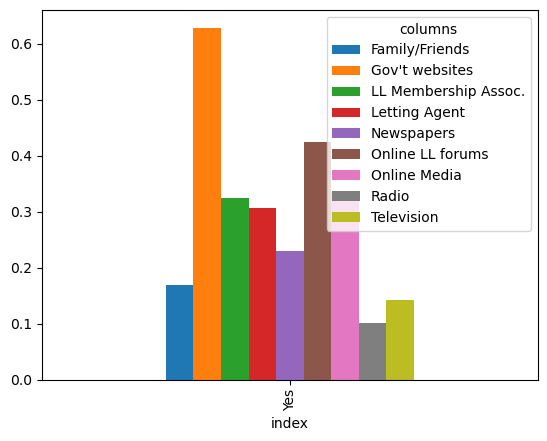

In [6]:
info_xt[1:].plot(kind="bar", use_index=True)

How many landlords were completely unaware of EPCE reqs?

In [7]:
len(df[df["EPCE"]=="I was not aware of this at all"].index)/len(df[df["EPCE"].notna()].index)

0.3010767343600927

In [8]:
df_age = df["Age4cat"].value_counts().to_frame()
f = lambda a : round(a / len(df[df["Age4cat"].notna()].index) * 100, 2)
df_age.applymap(f)

,count
Age4cat,
45 to 64,58.32
65 and over,28.58
35-44,10.58
18-34,2.53


# Target Market

Defining target market as:
- Has properties rated E, F, or G
- Has less than 10 properties

In [11]:
tgt_mkt = df[df["EPCEFG"] == "Yes"]
tgt_mkt = tgt_mkt[(tgt_mkt["NumPrpgrp"].isin(['1 only', '2 to 4', '5 to 9']))]

Getting stats for:
```py
"LLeth2cat", # LL ethnicity
"Age4cat", # LL Age
"ValperPrpA", # Avg mkt val per prop
"MktValgrpA", # Mkt val all props
"BTL", # Buy to let loan/other
"LnperPrpA", # Avg loan per prop
"LnValgrpA", # Total val all loans
"LTVgrpA", # LTV market val
"TmLLgrpB", # How long been LL
"LLExp", # Length experience as LL
"NumPrpgrp", # How many props
"RtIncgrpa", # Gross rental inc
"LLIncgrpA", # Total LL inc no rent
"TotIncgrp", # Total LL inc
"RtPrIncgrpA" # Rent as prop. inc
```

In [13]:
def get_stats(df: pd.DataFrame, col: str, percent:bool = True) -> pd.DataFrame:
    df_stats = df[col].value_counts().to_frame()
    if percent == True:
        f = lambda a : round(a / len(df[df[col].notna()].index), 4)
        df_stats = df_stats.applymap(f)
    return df_stats

## Basic Stats

How much of the total market of LLs are we looking at?

Going to exclude `na` vals from the total here:

In [11]:
tgt_len = len(tgt_mkt.index)
df_len = len(df[(df["EPCEFG"].notna()) & (df["NumPrpgrp"].notna())].index)

print(f" Target market: {tgt_len} \n Total market: {df_len} \n Percentage of total market: {round((tgt_len/df_len)*100,2)}%")

 Target market: 1103 
 Total market: 6150 
 Percentage of total market: 17.93%


Not including the property count, we could increase this to 29% of the total market:

In [12]:
len(df[df["EPCEFG"]=="Yes"].index)/len(df[df["EPCEFG"].notna()].index)

0.2885348583877996

How many of these landlords unaware of EPC regs?

In [13]:
len(tgt_mkt[tgt_mkt["EPCE"]=="I was not aware of this at all"].index)/len(tgt_mkt[tgt_mkt["EPCE"].notna()].index)

0.323956442831216

In [14]:
get_stats(tgt_mkt, "NumPrpgrp")

,count
NumPrpgrp,
2 to 4,0.4705
5 to 9,0.2874
1 only,0.2421
10 to 24,0.0000
25 to 100,0.0000
more than 100,0.0000


In [15]:
get_stats(tgt_mkt, "LLeth2cat")

,count
LLeth2cat,
White,0.8936
Other,0.1064


In [16]:
get_stats(tgt_mkt, "Age4cat")

,count
Age4cat,
45 to 64,0.5755
65 and over,0.3111
35-44,0.0924
18-34,0.0209


In [17]:
get_stats(tgt_mkt, "NumPrpgrp")

,count
NumPrpgrp,
2 to 4,0.4705
5 to 9,0.2874
1 only,0.2421
10 to 24,0.0000
25 to 100,0.0000
more than 100,0.0000


In [18]:
get_stats(tgt_mkt, "ValperPrpA")

,count
ValperPrpA,
"£200,000 to £499,999",0.3817
"£100,000 to £129,999",0.1605
"£150,000 to £179,999",0.1224
"£500,000 and over",0.1132
"£130,000 to £149,999",0.0607
"£50,000 to £79,999",0.0514
"£180,000 to £199,999",0.0463
"£80,000 to £99,999",0.0463
"up to £49,999",0.0175


In [19]:
df_stats = get_stats(tgt_mkt, "MktValgrpA")

Rough estimate of avg portfolio size:

In [20]:
df_stats = get_stats(tgt_mkt, "MktValgrpA")
df_stats["medmktval"] = [
    (500000+999999)/2,
    (200000+499999)/2,
    (1000000+1999999)/2,
    (100000+199999)/2,
    (2000000+2999999)/2,
    (100000)/2,
    (3000000+3999999)/2,
    6000000,
    (4000000+4999999)/2,
    (5000000+5999999)/2
]

pd.DataFrame(df_stats["count"].multiply(df_stats["medmktval"])).sum()

0    912549.5226
dtype: float64

How much debt do these folks have?

For LTVgrpA, I can likely get near averages.

In [21]:
# Add 0% LTV category if responded "Yes" to "No debt"
tgt_mkt["LTVgrpA"] = tgt_mkt.LTVgrpA.cat.add_categories(['0%'])
tgt_mkt.loc[tgt_mkt["Lntyp4"] == "Yes", "LTVgrpA"] = "0%"

In [22]:
df_stats = get_stats(tgt_mkt, "LTVgrpA")
df_stats

,count
LTVgrpA,
0%,0.3967
50 to 59%,0.1092
60 to 69%,0.0867
40 to 49%,0.0721
30 to 39%,0.0682
70 to 79%,0.0585
10 to 19%,0.0575
20 to 29%,0.0556
1 to 9%,0.0478


In [23]:
df_stats["med_ltv"] = [
    0,
    (.5+.59)/2,
    (.6+.69)/2,
    (.3+.39)/2,
    (.4+.49)/2,
    (.01+.09)/2,
    (.7+.79)/2,
    (.2+.29)/2,
    (.1+.19)/2,
    1,
    (.8+.89)/2,
    (.9+.99)/2,
]
pd.DataFrame(df_stats["count"].multiply(df_stats["med_ltv"])).sum()

0    0.281478
dtype: float64

Find for LLs who have debt

In [24]:
tgt_debt = tgt_mkt[tgt_mkt["Lntyp4"]=='No']
df_stats = get_stats(tgt_debt, "LTVgrpA")
df_stats["med_ltv"] = [
    (.5+.59)/2,
    (.6+.69)/2,
    (.4+.49)/2,
    (.3+.39)/2,
    (.7+.79)/2,
    (.1+.19)/2,
    (.2+.29)/2,
    (.01+.09)/2,
    1,
    (.8+.89)/2,
    (.9+.99)/2,
    0
]
pd.DataFrame(df_stats["count"].multiply(df_stats["med_ltv"])).sum()

0    0.469864
dtype: float64

## Market Value

In [131]:
mkt_val = tgt_mkt[["serial_2", # Unique Identifier
                   "ValperPrpA", # Avg mkt val per prop
                   "MktValgrpA", # Mkt val all props
                   #"LnperPrpA", # Avg loan per prop
                   #"LnValgrpA", # Total val all loans
                   #"LTVgrpA", # LTV market val
                   "NumPrpgrp", # How many props
                   #"RtIncgrpa", # Gross rental inc
                   #"LLIncgrpA", # Total LL inc no rent
                   #"TotIncgrp", # Total LL inc
                   #"RtPrIncgrpA", # Rent as prop. inc
]]
df_notna = df[df["EPCEFG"].notna()]
mkt_val.head(5)

,serial_2,ValperPrpA,MktValgrpA,NumPrpgrp
0,101638,"£130,000 to £149,999","£100,000 to £199,999",1 only
7,102965,"£200,000 to £499,999","£200,000 to £499,999",1 only
10,103689,"£150,000 to £179,999","£100,000 to £199,999",1 only
12,107804,"£500,000 and over","£1,000,000 to £1,999,999",2 to 4
15,106253,"£100,000 to £129,999","£100,000 to £199,999",1 only


In [97]:
print([i for i in df["MktValgrpA"].unique()])

['£100,000 to £199,999', '£500,000 to £999,999', '£200,000 to £499,999', '£1,000,000 to £1,999,999', '£2,000,000 to £2,999,999', nan, 'less than £100,000', '£4,000,000 to £4,999,999', '£3,000,000 to £3,999,999', '£6,000,000 or more', '£5,000,000 to £5,999,999']


In [136]:

NumPrpgrp = mkt_val["NumPrpgrp"]

loop = ["NumPrpMed", "NumPrpLow", "NumPrpHigh"]
med = [1, 3, 7, 17, 63, 100]
low = [1, 2, 5, 10, 25, 100]
high = [1, 4, 9, 24, 100, 150]
methods = [med, low, high]

i = 0
for l in loop:
    conditions = [
        NumPrpgrp == "1 only",
        NumPrpgrp == "2 to 4",
        NumPrpgrp == "5 to 9", 
        NumPrpgrp == '10 to 24',
        NumPrpgrp == '25 to 100', 
        NumPrpgrp == 'more than 100'
    ]
    output = methods[i]
    i += 1
    mkt_val[l] = np.select(conditions, output, np.nan)

/tmp/ipykernel_541/536477026.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_val[l] = np.select(conditions, output, np.nan)
/tmp/ipykernel_541/536477026.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_val[l] = np.select(conditions, output, np.nan)
/tmp/ipykernel_541/536477026.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [137]:
MktVal = mkt_val["MktValgrpA"]

loop = ["MktValMed", "MktValLow", "MktValHigh"]
med = [80000, 150000, 350000, 750000, 1500000, 2500000, 3500000, 4500000, 5500000, 10000000]
low = [0, 100000, 200000, 500000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000 ]
high = [99999, 199999, 499999, 999999, 1999999, 2999999, 3999999, 4999999, 5999999, 15000000]
methods = [med, low, high]

i = 0
for l in loop:
    conditions = [
        MktVal == 'less than £100,000',
        MktVal == '£100,000 to £199,999',
        MktVal == '£200,000 to £499,999',
        MktVal == '£500,000 to £999,999',
        MktVal == '£1,000,000 to £1,999,999',
        MktVal == '£2,000,000 to £2,999,999',
        MktVal == '£3,000,000 to £3,999,999',
        MktVal == '£4,000,000 to £4,999,999',
        MktVal == '£5,000,000 to £5,999,999',
        MktVal == '£6,000,000 or more'
    ]
    output = methods[i]
    mkt_val[l] = np.select(conditions, output, np.nan)
    i += 1

/tmp/ipykernel_541/3520147991.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_val[l] = np.select(conditions, output, np.nan)
/tmp/ipykernel_541/3520147991.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_val[l] = np.select(conditions, output, np.nan)
/tmp/ipykernel_541/3520147991.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [69]:
print([i for i in mkt_val["ValperPrpA"].unique()])

['£130,000 to £149,999', '£200,000 to £499,999', '£150,000 to £179,999', '£500,000 and over', '£100,000 to £129,999', '£50,000 to £79,999', '£80,000 to £99,999', nan, '£180,000 to £199,999', 'up to £49,999']


In [138]:
df1 = mkt_val[['NumPrpMed', 'NumPrpLow', 'NumPrpHigh']].sum().to_frame()
df2 = df_notna[['NumPrpMed', 'NumPrpLow', 'NumPrpHigh']].sum().to_frame()

prp_df = pd.DataFrame()
prp_df["tgt_mkt"] = df1[0]
prp_df["total"] = df2[0]
prp_df["tgt_pc"] = prp_df["tgt_mkt"].divide(prp_df["total"])
prp_df

,tgt_mkt,total,tgt_pc
NumPrpMed,4043.0,46197.0,0.087517
NumPrpLow,2890.0,27666.0,0.104460
NumPrpHigh,5196.0,65559.0,0.079257


In [118]:
df1 = mkt_val[['MktValMed', 'MktValLow', 'MktValHigh']].sum().to_frame()
df2 = df[['MktValMed', 'MktValLow', 'MktValHigh']].sum().to_frame()
prp_df = pd.DataFrame()
prp_df["tgt_mkt"] = df1[0]
prp_df["total"] = df2[0]
prp_df["tgt_pc"] = prp_df["tgt_mkt"].divide(prp_df["total"])
prp_df

,tgt_mkt,total,tgt_pc
MktValMed,9.360600e+08,7.590090e+09,0.123327
MktValLow,6.418000e+08,5.269700e+09,0.121791
MktValHigh,1.240399e+09,1.010259e+10,0.122780


In [139]:
tam = df[df["EPCEFG"] == "Yes"]

MktVal = tam["MktValgrpA"]

loop = ["MktValMed", "MktValLow", "MktValHigh"]
med = [80000, 150000, 350000, 750000, 1500000, 2500000, 3500000, 4500000, 5500000, 10000000]
low = [0, 100000, 200000, 500000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000 ]
high = [99999, 199999, 499999, 999999, 1999999, 2999999, 3999999, 4999999, 5999999, 15000000]
methods = [med, low, high]

i = 0
for l in loop:
    conditions = [
        MktVal == 'less than £100,000',
        MktVal == '£100,000 to £199,999',
        MktVal == '£200,000 to £499,999',
        MktVal == '£500,000 to £999,999',
        MktVal == '£1,000,000 to £1,999,999',
        MktVal == '£2,000,000 to £2,999,999',
        MktVal == '£3,000,000 to £3,999,999',
        MktVal == '£4,000,000 to £4,999,999',
        MktVal == '£5,000,000 to £5,999,999',
        MktVal == '£6,000,000 or more'
    ]
    output = methods[i]
    tam[l] = np.select(conditions, output, np.nan)
    i += 1

NumPrpgrp = tam["NumPrpgrp"]

loop = ["NumPrpMed", "NumPrpLow", "NumPrpHigh"]
med = [1, 3, 7, 17, 63, 100]
low = [1, 2, 5, 10, 25, 100]
high = [1, 4, 9, 24, 100, 150]
methods = [med, low, high]

i = 0
for l in loop:
    conditions = [
        NumPrpgrp == "1 only",
        NumPrpgrp == "2 to 4",
        NumPrpgrp == "5 to 9", 
        NumPrpgrp == '10 to 24',
        NumPrpgrp == '25 to 100', 
        NumPrpgrp == 'more than 100'
    ]
    output = methods[i]
    i += 1
    tam[l] = np.select(conditions, output, np.nan)

/tmp/ipykernel_541/993547761.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tam[l] = np.select(conditions, output, np.nan)
/tmp/ipykernel_541/993547761.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tam[l] = np.select(conditions, output, np.nan)


In [140]:
df1 = tam[['NumPrpMed', 'NumPrpLow', 'NumPrpHigh']].sum().to_frame()
df2 = df_notna[['NumPrpMed', 'NumPrpLow', 'NumPrpHigh']].sum().to_frame()

prp_df = pd.DataFrame()
prp_df["tgt_mkt"] = df1[0]
prp_df["total"] = df2[0]
prp_df["tgt_pc"] = prp_df["tgt_mkt"].divide(prp_df["total"])
prp_df

,tgt_mkt,total,tgt_pc
NumPrpMed,17007.0,46197.0,0.368141
NumPrpLow,9795.0,27666.0,0.354045
NumPrpHigh,24858.0,65559.0,0.379170


In [130]:
df1 = tam[['MktValMed', 'MktValLow', 'MktValHigh']].sum().to_frame()
df2 = df_notna[['MktValMed', 'MktValLow', 'MktValHigh']].sum().to_frame()
prp_df = pd.DataFrame()
prp_df["tgt_mkt"] = df1[0]
prp_df["total"] = df2[0]
prp_df["tgt_pc"] = prp_df["tgt_mkt"].divide(prp_df["total"])
prp_df

,tgt_mkt,total,tgt_pc
MktValMed,2.214250e+09,7.104560e+09,0.311666
MktValLow,1.542800e+09,4.933000e+09,0.312751
MktValHigh,2.959599e+09,9.454895e+09,0.313023


# Tgt Mkt Media

In [218]:
mkt_inf = tgt_mkt[[
        "LLInfo01", # Where info: Letting Agent
        "LLInfo02", # Where info: LL membership ass. or org
        "LLInfo03", # Where info: Online landlord forums/websites
        "LLInfo04", # Where info: Gov't websites
        "LLInfo05", # Where info: Family/friends
        "LLInfo06", # Where info: Online media
        "LLInfo07", # Where info: TV
        "LLInfo08", # Where info: Radio
        "LLInfo09", # Where info: Newspapers
]]

mkt_inf.columns = [
    "Letting Agent",
    "LL Membership Assoc.",
    "Online LL forums",
    "Gov't websites",
    "Family/Friends",
    "Online Media",
    "Television",
    "Radio",
    "Newspapers"
]

mkt_inf.replace(('Yes', 'No'), (True, False), inplace=True)
mkt_inf = mkt_inf.astype(bool)
mkt_inf.dtypes

/tmp/ipykernel_541/3691647518.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_inf.replace(('Yes', 'No'), (True, False), inplace=True)


Letting Agent           bool
LL Membership Assoc.    bool
Online LL forums        bool
Gov't websites          bool
Family/Friends          bool
Online Media            bool
Television              bool
Radio                   bool
Newspapers              bool
dtype: object

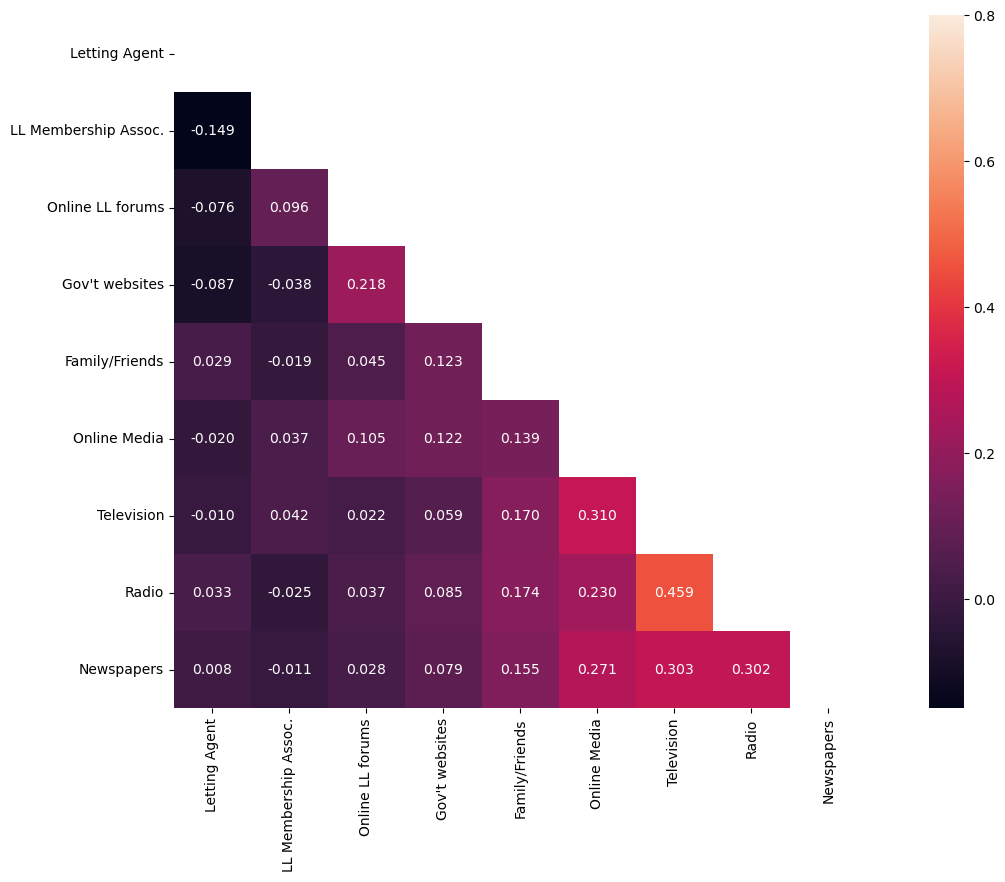

In [219]:
import seaborn as sns
from matplotlib import pyplot as plt

corrmat = mkt_inf.corr()
f, ax = plt.subplots(figsize=(16, 9))

# Get rid of upper portion
mask = np.triu(np.ones_like(corrmat, dtype=bool))

sns.heatmap(corrmat, vmax=.8, square=True,
            annot=True, fmt='.3f', mask=mask);

In [185]:
corrmat

,Letting Agent,LL Membership Assoc.,Online LL forums,Gov't websites,Family/Friends,Online Media,Television,Radio,Newspapers
Letting Agent,1.000000,-0.149331,-0.075900,-0.086956,0.028812,-0.020394,-0.009570,0.033441,0.007789
LL Membership Assoc.,-0.149331,1.000000,0.095935,-0.037707,-0.018984,0.036556,0.041811,-0.025217,-0.010950
Online LL forums,-0.075900,0.095935,1.000000,0.218243,0.045122,0.105494,0.021717,0.036970,0.027812
Gov't websites,-0.086956,-0.037707,0.218243,1.000000,0.123143,0.121945,0.059206,0.085282,0.078884
Family/Friends,0.028812,-0.018984,0.045122,0.123143,1.000000,0.138918,0.170468,0.174341,0.155426
Online Media,-0.020394,0.036556,0.105494,0.121945,0.138918,1.000000,0.310026,0.230084,0.271136
Television,-0.009570,0.041811,0.021717,0.059206,0.170468,0.310026,1.000000,0.458538,0.303148
Radio,0.033441,-0.025217,0.036970,0.085282,0.174341,0.230084,0.458538,1.000000,0.301794
Newspapers,0.007789,-0.010950,0.027812,0.078884,0.155426,0.271136,0.303148,0.301794,1.000000


In [225]:
df = mkt_inf.sum().to_frame()
f = lambda a : round(a / len(mkt_inf.index), 4)
df = df.applymap(f)
df.columns = ["Percentage"]
df

,Percentage
Letting Agent,0.2874
LL Membership Assoc.,0.3037
Online LL forums,0.4442
Gov't websites,0.6247
Family/Friends,0.1904
Online Media,0.3146
Television,0.1505
Radio,0.0979
Newspapers,0.2158


[Text(0, 0, '0.2874'),
 Text(0, 0, '0.3037'),
 Text(0, 0, '0.4442'),
 Text(0, 0, '0.6247'),
 Text(0, 0, '0.1904'),
 Text(0, 0, '0.3146'),
 Text(0, 0, '0.1505'),
 Text(0, 0, '0.0979'),
 Text(0, 0, '0.2158')]

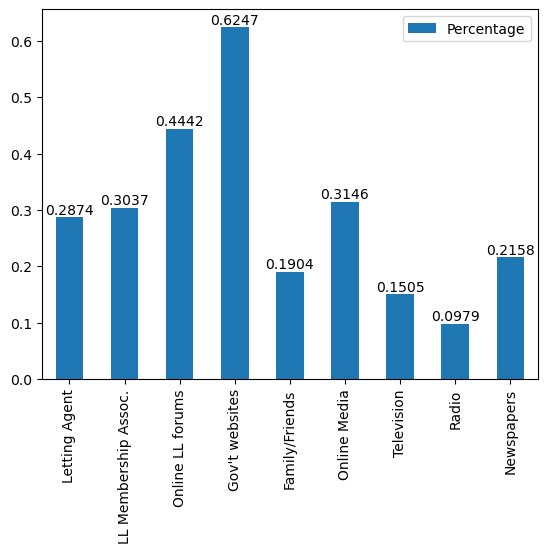

In [230]:
ax = df.plot.bar()
ax.bar_label(ax.containers[0])

AgtuseA1 - For letting services

AcqMeth

In [24]:
get_stats(tgt_mkt, "AgtuseA3")

,AgtuseA3
Yes,0.5413
No,0.4587


In [22]:
get_stats(tgt_mkt, "AcqMeth")

,AcqMeth
I / we bought it with the intention of letting it out,0.6204
I / we bought it to live in myself,0.2291
I / we inherited it,0.0631
Other (please specify),0.0476
I / we received it as a gift,0.0165
I / we built it to live in myself / ourselves,0.0097
I / we built it with the intention of letting it out,0.0078
I / we acquired the organisation that owned it,0.0029
I / we bought it through the council Right to Buy,0.0029


In [21]:
tgt_nodebt = tgt_mkt[tgt_mkt["Lntyp4"]=='Yes']
get_stats(tgt_nodebt, "AcqMeth")

,AcqMeth
I / we bought it with the intention of letting it out,0.6164
I / we bought it to live in myself,0.1509
I / we inherited it,0.1151
Other (please specify),0.0588
I / we received it as a gift,0.0230
I / we built it to live in myself / ourselves,0.0128
I / we built it with the intention of letting it out,0.0102
I / we bought it through the council Right to Buy,0.0077
I / we acquired the organisation that owned it,0.0051
